In [7]:
# install.packages("RSQLite", repos="http://cran.us.r-project.org")

In [8]:
# install.packages("twitteR", repos="http://cran.us.r-project.org")

In [16]:
# install.packages("ggmap", repos="http://cran.us.r-project.org")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Above lines of code were used to download the required packages.

In [4]:
library("twitteR")
setup_twitter_oauth("", "", "", "")

[1] "Using direct authentication"


Insert Twitter Keys above.

In [2]:
search_query <- '#superbowl'
tweets <- searchTwitter(search_query, n=20000)
head(tweets)
length(tweets)
Data_frame <- twListToDF(tweets)
nrow(Data_frame)

[1] "Rate limited .... blocking for a minute and retrying up to 119 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 118 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 117 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 116 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 115 times ..."


[[1]]
[1] "2Jakeycakey: RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ"

[[2]]
[1] "tweetsocialnews: Your News on Your Network. https://t.co/uNiLzDfIEn  #marketing  #superbowl #influencer #WSJ #business #bloomberg… https://t.co/UzZLEiIZPf"

[[3]]
[1] "Chris_chapa23: RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ"

[[4]]
[1] "GoobZWN: RT @Themickings: Check out the mic kings!\nWe talk #superbowl &amp; best collabs #podernfamily\nDream collabs, superbowl and secret fandoms https…"

[[5]]
[1] "daniellasalice: RT @justinbieber: My #SuperBowl commercial w/ @TMobile. Let’s go!! Let me see those #UnlimitedMoves https://t.co/J3YYPkR9nw"

[[6]]
[1] "GagasPeter: RT @joannegagawayne: Thank u Gaga, we love your songs! ♥ #SuperBowl #Joanne https://t.co/jnewG0TTdu"


[1] 20000

[1] 20000

In [15]:
library(RSQLite)
Sys.setlocale('LC_ALL','C')
con <- dbConnect(SQLite(), dbname="/Users/Amardeep/Documents/Semester_2/Dic/Tweet_final")
dbWriteTable(con, "Tweetr_DB", Data_frame, append= TRUE)
dbReadTable(con, "Tweetr_DB")

[1] "C/C/C/C/C/en_US.UTF-8"

[1] TRUE

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ,0,0,NA,1487218873,0,NA,832082382475902977,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2Jakeycakey,7783,1,0,NA,NA
Your News on Your Network. https://t.co/uNiLzDfIEn #marketing #superbowl #influencer #WSJ #business #bloomberg<U+2026> https://t.co/UzZLEiIZPf,0,0,NA,1487218862,1,NA,832082332597235712,NA,"<a href=""http://sproutsocial.com"" rel=""nofollow"">Sprout Social</a>",tweetsocialnews,0,0,0,NA,NA
RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ,0,0,NA,1487218856,0,NA,832082310992388096,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Chris_chapa23,7783,1,0,NA,NA
"RT @Themickings: Check out the mic kings! We talk #superbowl &amp; best collabs #podernfamily Dream collabs, superbowl and secret fandoms https<U+2026>",0,0,NA,1487218837,0,NA,832082229794848769,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",GoobZWN,34,1,0,NA,NA
RT @justinbieber: My #SuperBowl commercial w/ @TMobile. Let<U+2019>s go!! Let me see those #UnlimitedMoves https://t.co/J3YYPkR9nw,0,0,NA,1487218837,0,NA,832082228834340864,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",daniellasalice,63794,1,0,NA,NA
"RT @joannegagawayne: Thank u Gaga, we love your songs! <U+2665> #SuperBowl #Joanne https://t.co/jnewG0TTdu",0,0,NA,1487218828,0,NA,832082190200606724,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",GagasPeter,2,1,0,NA,NA
RT @AlbumsUSA: What Female Artist would be the Best for the next #SuperBowl 52 #HalfTimeShow in 2018? #Swifties #BritneyArmy #RIHANNANAVY<U+2026>,0,0,NA,1487218801,0,NA,832082080079216640,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Sm_aok,141,1,0,NA,NA
RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ,0,0,NA,1487218791,0,NA,832082037263699969,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RappersSaid,7783,1,0,NA,NA
Your News on Your Network. https://t.co/vWKSfhhX4F #marketing #superbowl #influencer #WSJ #business #bloomberg<U+2026> https://t.co/FvjLMDXjrm,0,0,NA,1487218741,1,NA,832081828286779392,NA,"<a href=""http://sproutsocial.com"" rel=""nofollow"">Sprout Social</a>",socialnewstweet,0,0,0,NA,NA
RT @Furious8Movie: We're getting very close to April 14. Here's the #SuperBowl trailer for #TheFateOfTheFurious in case you missed it. #F8<U+2026>,0,0,NA,1487218710,0,NA,832081698607230976,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hanna_Arvberger,300,1,0,NA,NA


The code above creates a Database in the given directory where all the data is being stored under various different tables. Please create a new Database if the code needs to be run from the start. You could also call the database and use the Data stored in it which is done below. Please input the location of the DataBase in the variable "dbname".

In [16]:
library(ggmap)
user_name <- lookupUsers(Data_frame$screenName)
user_name_frame <- twListToDF(user_name)

The code above looks up the User information and stores them in a dataframe. The dataframe is then stored in a new Table.

In [17]:
Sys.setlocale('LC_ALL','C')
dbWriteTable(con, "Name_DB", user_name_frame)
dbReadTable(con, "Name_DB")

[1] "C/C/C/C/C/en_US.UTF-8"

[1] TRUE

,description,statusesCount,followersCount,favoritesCount,friendsCount,url,name,created,protected,verified,screenName,location,lang,id,listedCount,followRequestSent,profileImageUrl
2Jakeycakey,UTC. Don't forget that there is someone up above. sc: jakey2cakey,38017,704,21130,441,NA,Jake Littleton,1436800974,0,0,2Jakeycakey,,en,3374122157,6,0,http://pbs.twimg.com/profile_images/825019038732603392/TLV86e-5_normal.jpg
tweetsocialnews,Tweet Social News is the network of https://t.co/xFyNt1xX1w 321 536-3485,27771,219125,1,89953,https://t.co/xFyNt1xX1w,Tweet Social News,1439248205,0,0,tweetsocialnews,,en,3311888438,960,0,http://pbs.twimg.com/profile_images/721501487675809792/oG9TjtJ8_normal.jpg
Chris_chapa23,956<U+2708><U+FE0F>979 mistaken as a white boy <ed><U+00A0><U+00BC><ed><U+00B7><U+00B2><ed><U+00A0><U+00BC><ed><U+00B7><U+00BD>,9553,719,6157,790,NA,CHRISTIAN LOUBOUTIN,1395683492,0,0,Chris_chapa23,TX,en,2409357277,3,0,http://pbs.twimg.com/profile_images/810717399603355648/2gXi6gUp_normal.jpg
GoobZWN,Hey there everybody I am GoobZ and this is @RipkenWN and we are the @WrassleNerds We talk mostly wrestling but sometimes get nerdy with it! check us out FOLKS!!,3136,882,1556,2285,https://t.co/l5aNFhnhD0,WrassleNerd GoobZ,1419102717,0,0,GoobZWN,"Toronto, Ontario",en,2937368664,16,0,http://pbs.twimg.com/profile_images/775473878701338624/9zwogVVi_normal.jpg
daniellasalice,,4561,157,5151,433,NA,Daniella,1400523451,0,0,daniellasalice,,en,2508089102,6,0,http://pbs.twimg.com/profile_images/823370551267823616/47fP8gqQ_normal.jpg
GagasPeter,"ThatboyizaMons<U+2020>er ~ @ladygaga helped me #turn50shit ~ Tara, Joe, BTWF & others fol ~ Dad, Decolonized Cis ~ #IAmNotJust <U+00AF>\_(<U+30C4>)_/<U+00AF> #ProjectLG #MonsterFollowBack",31321,5868,2688,5992,https://t.co/pq9KdRnnEw,<U+01A4> <U+0248> <U+0141>,1307815038,0,0,GagasPeter,U S A,en,315333908,120,0,http://pbs.twimg.com/profile_images/828483859222130690/3eQVUDp8_normal.jpg
Sm_aok,i have a exelente<ed><U+00A0><U+00BC><ed><U+00BE><U+00A4> voice i have many forward of be a great singer i have faith but me roast lack somebody that me help to achieve this.<ed><U+00A0><U+00BD><ed><U+00B2><U+0094><U+2764>,105,22,970,11,https://t.co/9jivbrDmgz,SM <ed><U+00A0><U+00BC><ed><U+00BC><U+0090>,1482497476,0,0,Sm_aok,CDMX Daydreamer,es,812279404671934464,0,0,http://pbs.twimg.com/profile_images/830815160860291072/OTBLRRXQ_normal.jpg
RappersSaid,Everything Rap fan page. The Biggest Rap Related Account on Twitter.,2040,467841,9,454,NA,Rappers Said,1363068382,0,0,RappersSaid,,en,1261249778,384,0,http://pbs.twimg.com/profile_images/524362180511404032/5TCSqcrI_normal.jpeg
socialnewstweet,Getting the word out.,15475,140306,0,22396,https://t.co/xFyNt1xX1w,News Tweets,1468097071,0,0,socialnewstweet,,en,751879730089959425,700,0,http://pbs.twimg.com/profile_images/751884881773244416/eD_Zv9NA_normal.jpg
Hanna_Arvberger,"know the rules well, so you can break them effectively // ily liv",4211,500,7971,500,NA,Hanna Arvberger,1381679964,0,0,Hanna_Arvberger,,en,712869327,0,0,http://pbs.twimg.com/profile_images/792616575958413312/GXbCtBzy_normal.jpg


In [7]:
Username_loc <- dbGetQuery(con, "SELECT * FROM `Name_DB` WHERE location != ''")
nrow(Username_loc)

[1] 9421

In [11]:
Sys.setlocale('LC_ALL','C')
dbWriteTable(con, "Name_loc_DB", Username_loc)
dbReadTable(con, "Name_loc_DB")

[1] TRUE

[1] "C/C/C/C/C/en_US.UTF-8"

[1] TRUE

,description,statusesCount,followersCount,favoritesCount,friendsCount,url,name,created,protected,verified,screenName,location,lang,id,listedCount,followRequestSent,profileImageUrl
Chris_chapa23,956<U+2708><U+FE0F>979 mistaken as a white boy <ed><U+00A0><U+00BC><ed><U+00B7><U+00B2><ed><U+00A0><U+00BC><ed><U+00B7><U+00BD>,9553,719,6157,790,NA,CHRISTIAN LOUBOUTIN,1395683492,0,0,Chris_chapa23,TX,en,2409357277,3,0,http://pbs.twimg.com/profile_images/810717399603355648/2gXi6gUp_normal.jpg
GoobZWN,Hey there everybody I am GoobZ and this is @RipkenWN and we are the @WrassleNerds We talk mostly wrestling but sometimes get nerdy with it! check us out FOLKS!!,3136,882,1556,2285,https://t.co/l5aNFhnhD0,WrassleNerd GoobZ,1419102717,0,0,GoobZWN,"Toronto, Ontario",en,2937368664,16,0,http://pbs.twimg.com/profile_images/775473878701338624/9zwogVVi_normal.jpg
GagasPeter,"ThatboyizaMons<U+2020>er ~ @ladygaga helped me #turn50shit ~ Tara, Joe, BTWF & others fol ~ Dad, Decolonized Cis ~ #IAmNotJust <U+00AF>\_(<U+30C4>)_/<U+00AF> #ProjectLG #MonsterFollowBack",31321,5868,2688,5992,https://t.co/pq9KdRnnEw,<U+01A4> <U+0248> <U+0141>,1307815038,0,0,GagasPeter,U S A,en,315333908,120,0,http://pbs.twimg.com/profile_images/828483859222130690/3eQVUDp8_normal.jpg
Sm_aok,i have a exelente<ed><U+00A0><U+00BC><ed><U+00BE><U+00A4> voice i have many forward of be a great singer i have faith but me roast lack somebody that me help to achieve this.<ed><U+00A0><U+00BD><ed><U+00B2><U+0094><U+2764>,105,22,970,11,https://t.co/9jivbrDmgz,SM <ed><U+00A0><U+00BC><ed><U+00BC><U+0090>,1482497476,0,0,Sm_aok,CDMX Daydreamer,es,812279404671934464,0,0,http://pbs.twimg.com/profile_images/830815160860291072/OTBLRRXQ_normal.jpg
RandallGoulding,"Our expertise includes bringing companies public in creative ways, including the utilization of our unique and exclusive Rent-a-Pubco program.",29626,52752,0,8229,https://t.co/JxCcu6JvyU,Securities Counselor,1430787852,0,0,RandallGoulding,"North Chicago, IL/ Washington",en,3185728742,1106,0,http://pbs.twimg.com/profile_images/595415002909138944/LkSBYFXm_normal.png
Myong_Wisley,All up in this interwebs in comfortable footwear. present: MTV/VH1 Digital Production & Development. past: Sports Journalism. always: sneaker enthusiast.,489664,1125,0,0,NA,Myong _Wisley,1321489854,0,0,Myong_Wisley,"Burbank, California",en,414391600,648,0,http://pbs.twimg.com/profile_images/1839601946/179841668561_normal.jpg
tohuers,"Quer<U+00ED>a tener una bio bien chingona, pero se necesitar<U+00ED>an un chingo de hojas, as<U+00ED> que me quede con esto porque los res<U+00FA>menes me dan flojera.",102117,4141,16168,1128,https://t.co/f2MdfyW1uB,Bernal <U+26A1>,1255835391,0,0,tohuers,"Oaxaca, M<U+00E9>xico",es,83283623,82,0,http://pbs.twimg.com/profile_images/831014745322950656/lkNgeQPX_normal.jpg
Mosz_mt,"Editor General de Deportes en Publimetro M<U+00E9>xico. Futbolista, nac<U+00ED> en Horley, London; fan de Chivas, Chelsea y West Ham. Aqu<U+00ED> s<U+00F3>lo hay opiniones personales.",30452,824,335,1455,https://t.co/3RdKtS8UVv,Mosz MT,1300313234,0,0,Mosz_mt,"London, England",es,267402903,28,0,http://pbs.twimg.com/profile_images/818343934619303936/rMF0LV_H_normal.jpg
fourfirs,"enjoyinglifewiththegrandkids whohavemecomingandgoing, I wouldn'thaveitanyotherway, except for #childhoodcancer I support #TeamPennyArmstrong @seattlechildren +",1573,587,1320,2198,https://t.co/Wa6SWfYXAB,Steve Smith + 3 dogs,1272742564,0,0,fourfirs,"Bellevue, WA (NO DM'S THANKS)",en,139170654,8,0,http://pbs.twimg.com/profile_images/827262785780273152/M7mGKXtT_normal.jpg
DaveMakowski,I'm either a genius or a loser depending on who you ask.,728,264,470,657,https://t.co/4dFTuF1mCq,Dave Makowski,1314470070,0,0,DaveMakowski,"Massachusetts, USA",en,363216214,27,0,http://pbs.twimg.com/profile_images/755667748445949952/Uv1I8H7k_normal.jpg


The code in cells above only takes the locations for which locations are available and stores them in a new table.

In [31]:
tweets_2500 <- dbGetQuery(con, "SELECT * FROM `Name_loc_DB` WHERE rowid between 0 and 2500")
location <- geocode(tweets_2500$location)

ERROR: Error: google restricts requests to 2500 requests a day for non-business use.


The code above retrieves 2500 entries from the Database (google_API limit) and finds their geocodes. The rowid parameters can be manipulated to convert more data gradually over a course of few days. The Code snippet above and the code snippets following it can be rerun again and agin to amass a bigger dataset and plotting those data information on the map by just manipulating the Row_id of the Database above.

In [21]:
Sys.setlocale('LC_ALL','C')
dbWriteTable(con, "location", location, append = TRUE)
dbReadTable(con, "location")
nrow(location)

[1] "C/C/C/C/C/en_US.UTF-8"

[1] TRUE

lon,lat
NA,NA
NA,NA
-99.9018131,31.968599
-79.3831843,43.653226
NA,NA
-95.7128910,37.090240
NA,NA
NA,NA
NA,NA
NA,NA


[1] 2500

The Location information is now stored in a new table.

In [22]:
library(RSQLite)
Sys.setlocale('LC_ALL','C')
con <- dbConnect(SQLite(), dbname="/Users/Amardeep/Documents/Semester_2/Dic/Tweet_final")
dbGetQuery(con, "DELETE FROM `location` WHERE lon is NULL")

[1] "C/C/C/C/C/en_US.UTF-8"

<0 x 0 matrix>

The following code eliminates any Null locations that may be present in the dataset.

In [24]:
dbGetQuery(con, "SELECT COUNT(*) FROM `location`")
dbGetQuery(con, "UPDATE location SET lon = ROUND(lon, 2)")
dbGetQuery(con, "UPDATE location SET lat = ROUND(lat, 2)")
dbGetQuery(con, "DELETE FROM `location` WHERE lon < -124.73")
dbGetQuery(con, "SELECT COUNT(*) FROM `location`")
dbGetQuery(con, "DELETE FROM `location` WHERE lon > -67")
dbReadTable(con, "location")
dbGetQuery(con, "DELETE FROM `location` WHERE lat > 49.4")
dbGetQuery(con, "DELETE FROM `location` WHERE lat < 24.54")

COUNT(*)
825


<0 x 0 matrix>

<0 x 0 matrix>

<0 x 0 matrix>

COUNT(*)
825


<0 x 0 matrix>

lon,lat
-99.90,31.97
-79.38,43.65
-95.71,37.09
-87.87,42.30
-118.31,34.18
-71.38,42.41
-71.14,42.66
-90.07,30.36
-79.39,43.67
-87.63,41.88


<0 x 0 matrix>

<0 x 0 matrix>

The code above rounds the location information and eliminates locations from the database outside the borders of the United States.

In [26]:
final_count <- dbGetQuery(con, "select lon, lat, count(*) AS Frequency from location group by lon, lat")
print(final_count)

        lon   lat Frequency
1   -123.92 45.99         1
2   -123.37 48.45         1
3   -123.12 49.28         2
4   -123.03 44.99         1
5   -122.99 38.58         1
6   -122.95 46.72         1
7   -122.71 38.44         2
8   -122.68 45.52         1
9   -122.65 38.04         1
10  -122.56 40.64         1
11  -122.55 47.24         1
12  -122.54 47.00         1
13  -122.48 48.75         1
14  -122.46 38.29         1
15  -122.42 37.77         4
16  -122.34 47.61         1
17  -122.33 47.61         8
18  -122.32 37.56         1
19  -122.31 47.67         1
20  -122.30 47.82         1
21  -122.29 37.83         2
22  -122.27 37.80         2
23  -122.26 38.10         1
24  -122.24 37.49         1
25  -122.20 40.20         1
26  -122.18 37.42         4
27  -122.09 37.69         1
28  -122.08 37.67         1
29  -122.03 36.97         1
30  -121.92 37.80         1
31  -121.91 47.54         1
32  -121.89 36.60         1
33  -121.89 37.34         4
34  -121.77 36.75         1
35  -121.77 36.90   

The code above groups similar locations together and finds their respective frequencies.

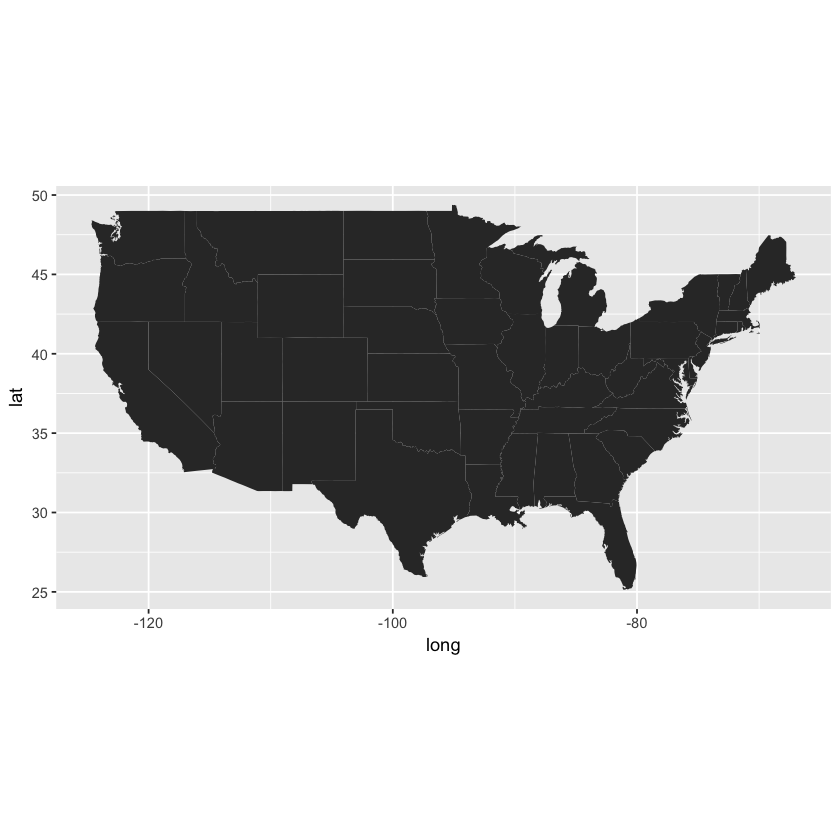

In [29]:
library(ggmap)
library(maps)
usa <- map_data("state")
plot <- ggplot() + geom_polygon(data = usa, aes(x=long, y = lat, group = group)) + coord_fixed(1.3)
plot

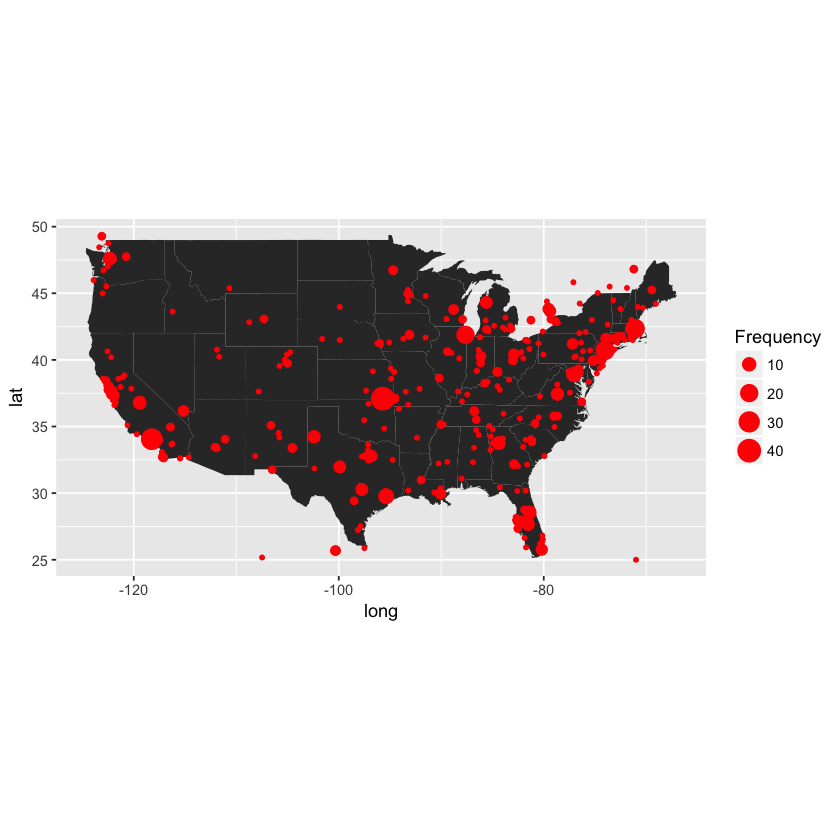

In [28]:
plot + geom_point(data = final_count, aes(x = lon, y = lat, size = Frequency), color = "red")

The code above marks the locations on the map of USA where the size of the blob is determined by the frequency. 

Refrences:
https://docs.google.com/viewer?url=http%3A%2F%2Fgeoffjentry.hexdump.org%2FtwitteR.pdf
https://docs.google.com/viewer?url=http%3A%2F%2Fwww.cse.buffalo.edu%2F~bina%2Fcse487%2Fspring2017%2FLectures%2FRonJupyter.docx
https://www.r-bloggers.com/r-and-sqlite-part-1/
http://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html